In [62]:
import pyaudio
import wave
import datetime
import os, sys
import soundfile as sf
os.chdir("C:\\Users\\User\\Documents\\comparing_acoustic_deep_neural_networks\\")

import csv, os, glob
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model

sys.path.append('src')
sys.path.append('src/models')
from models.get_models import get_model
import models.yamnet_tf2.params as params
params = params.Params(sample_rate=16000, patch_hop_seconds=0.256) # 0.25
import dataload_utils.data_load as data_load

parent_dir = "C:/Users/User/Documents/cer_dataset_16k_resampled_split\\"
dataset_loader = data_load.Dataset_loader(parent_dir, params)
filenames_all = dataset_loader.__filenames_all__
classes = dataset_loader.__classes__
num_classes = dataset_loader.__num_classes__
print("classes: {}, num_classes: {}".format(classes, num_classes))

MODEL_NAME="YAMNET"
model = get_model(MODEL_NAME)
ckp_path = "C:\\Users\\User\\Documents\\comparing_acoustic_deep_neural_networks\\training\\20220416-150422_main\\YAMNET\\checkpoints\\cp.ckpt"
model.load_weights(ckp_path)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(), #from_logits=True
    metrics=['accuracy'],
)

Number of files in Class_00_Modified_car_engines: 4644
Number of files in Class_01_Regular_Vehicles: 9539
Number of files in Class_02_Tools_and_Mechanisms: 13307
Number of files in Class_03_Environmental_Sounds: 10488
Number of files:  37978
classes: ['Class_00_Modified_car_engines', 'Class_01_Regular_Vehicles', 'Class_02_Tools_and_Mechanisms', 'Class_03_Environmental_Sounds'], num_classes: 4


In [2]:
# plot feature map of first conv layer for given image
# load the model
# redefine model to output right after the first hidden layer
model_1st_layer = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_1st_layer.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 64, 1)]       0         
                                                                 
 layer1/conv (Conv2D)        (None, 48, 32, 32)        288       
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


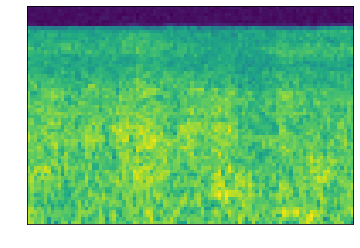

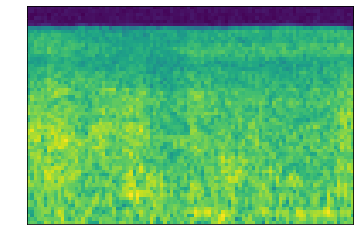

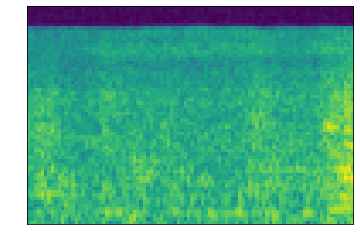

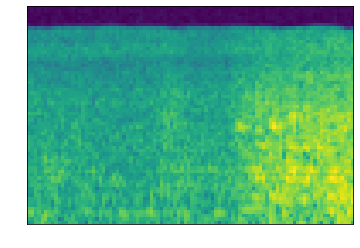

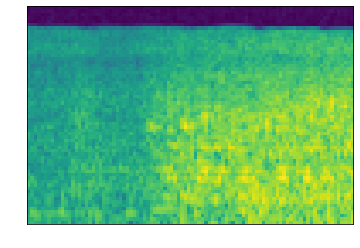

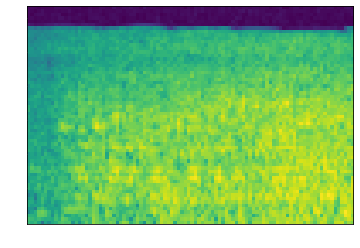

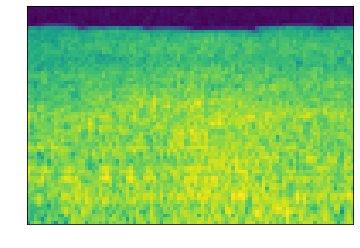

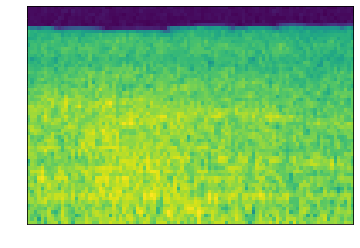

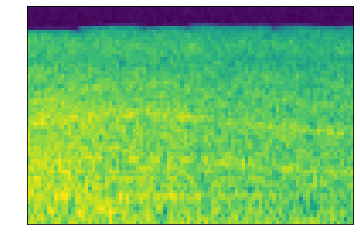

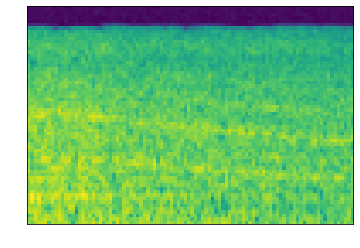

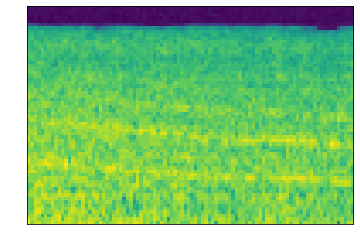

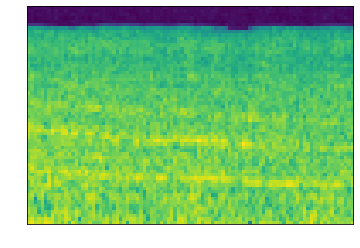

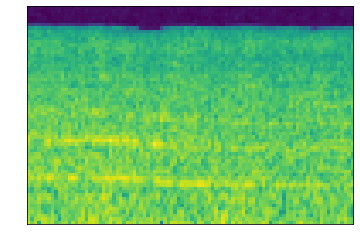

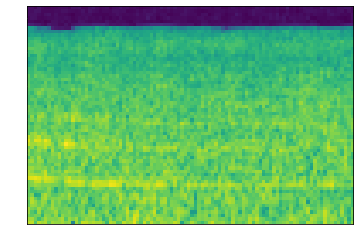

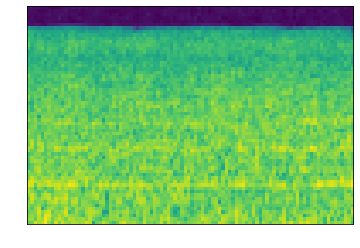

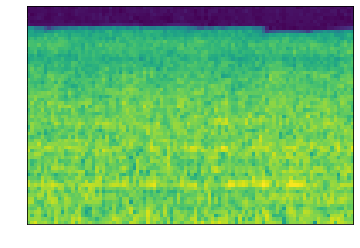

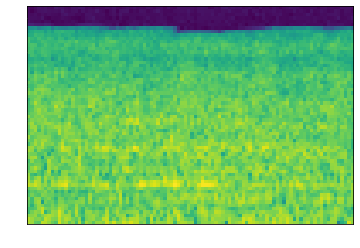

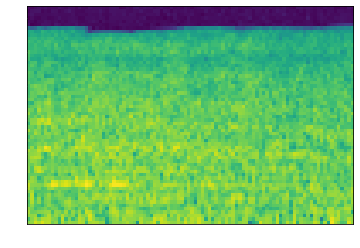

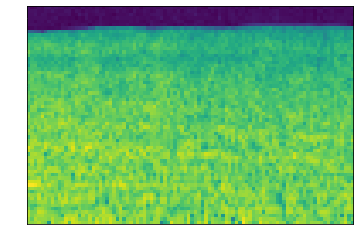

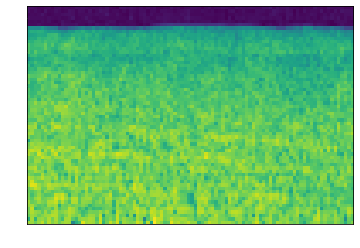

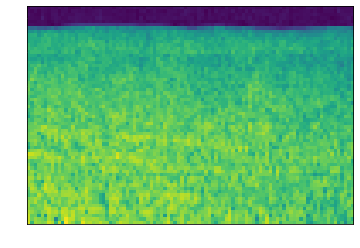

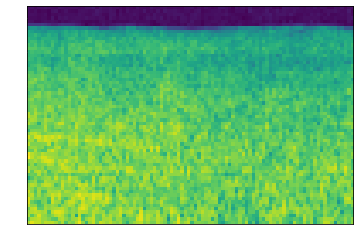

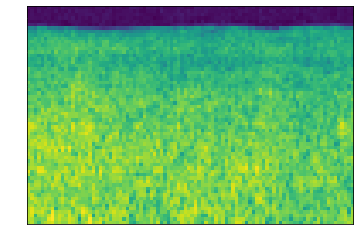

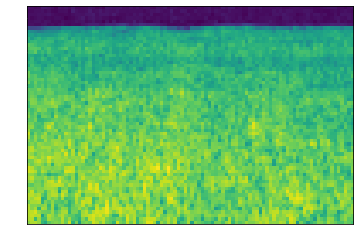

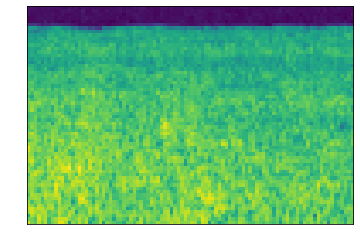

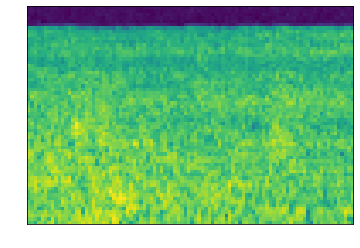

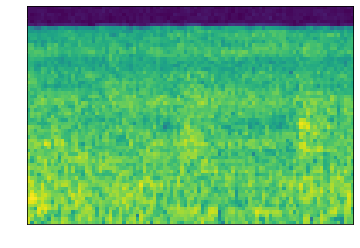

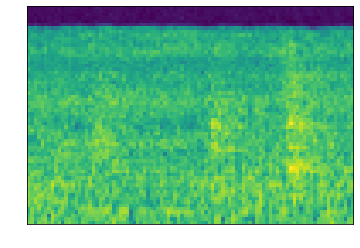

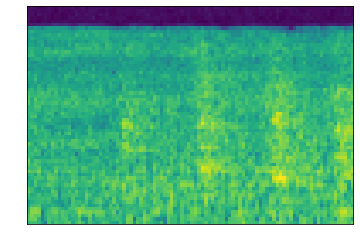

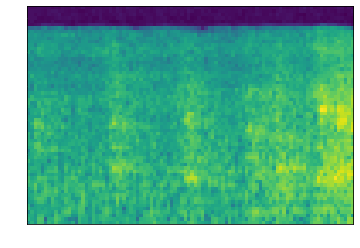

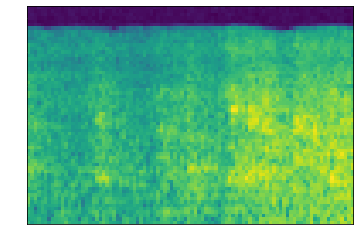

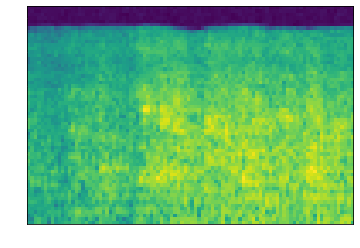

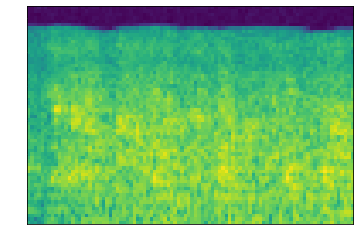

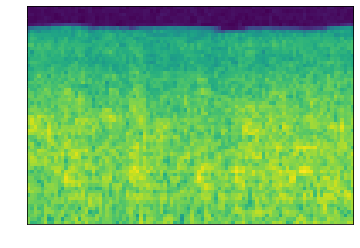

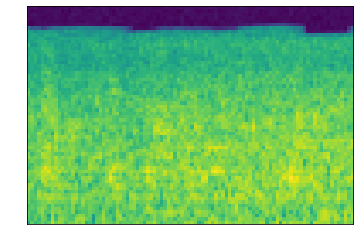

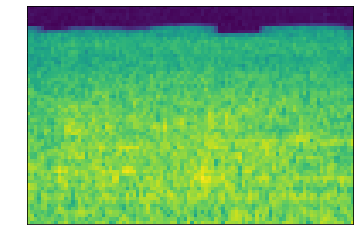

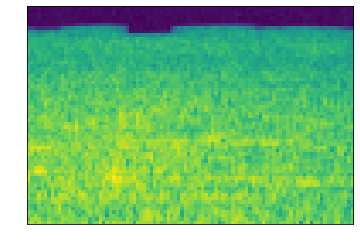

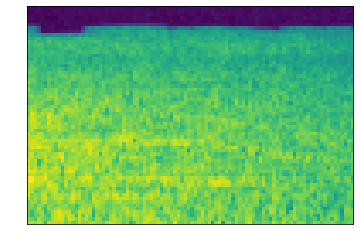

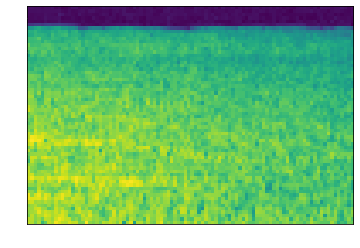

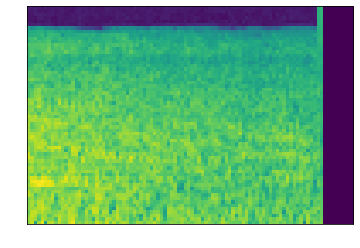

In [132]:

import matplotlib.pyplot as plt


COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

filename = filenames_all[55]
waveform = dataset_loader._get_waveform_no_label(filename)
spec, melspec = dataset_loader.get_embeddings_and_features(filename) 

# fig, ax = plt.subplots(3, 1, figsize=(20,10))
# ax = ax.flatten()
# ax[0].plot(waveform)
# ax[1].imshow(tf.transpose(spec, [1,0]), origin='lower')
# get feature map for first hidden layer
for m in melspec:
    plt.imshow(tf.transpose(m, [1,0,2]), origin='lower')
    plt.show()


In [4]:
feature_maps = model_1st_layer.predict(melspec)[0]
# feature_maps.shape
feature_maps = tf.transpose(feature_maps, [2, 0, 1])
feature_maps.shape

TensorShape([32, 48, 32])

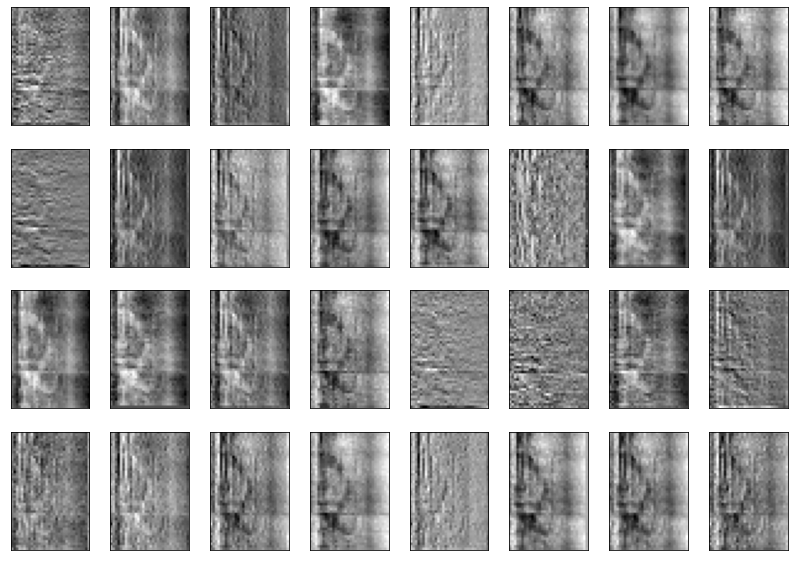

In [5]:
fig, axs = plt.subplots(4, 8, figsize=(14,10))
axs=axs.flatten()
for feature_map, ax in zip(feature_maps, axs):
	# specify subplot and turn of axis
	# plot filter channel in grayscale
	ax.imshow(feature_map, cmap='gray')
	ax.set_xticks([])
	ax.set_yticks([])
	# print(feature_map.shape)
# show the figure
plt.show()

C:/Users/User/Documents/cer_dataset_16k_resampled_split\Class_00_Modified_car_engines\youtube-dl\March\sBEST OF Modified Car Sounds 2021 ! 2000HP_094_000.wav


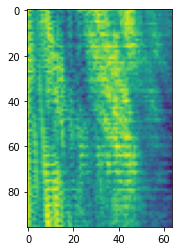

In [53]:
import random
filenames_all
filename = filenames_all[random.randint(0, 10000)]
print(filename)
waveform = dataset_loader._get_waveform_no_label(filename)
spec, melspec = dataset_loader.get_embeddings_and_features(filename) 
plt.imshow(melspec[0])

Current layer: conv1


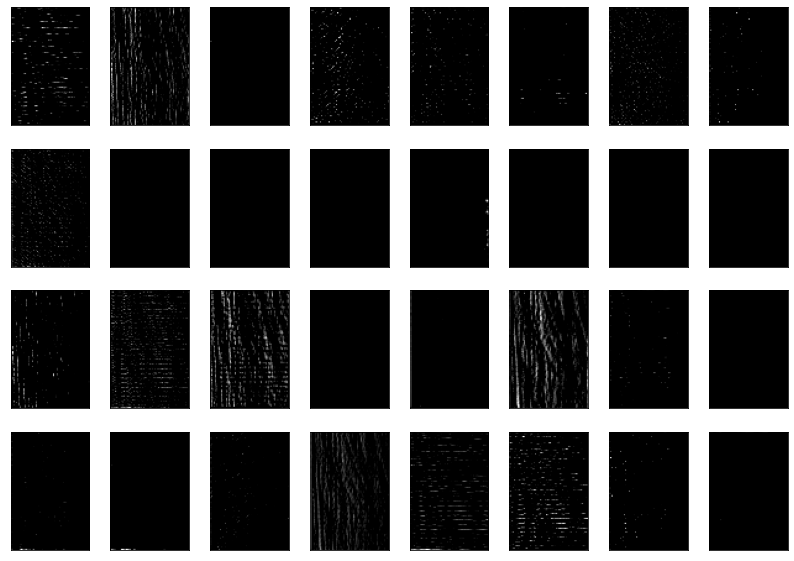

Current layer: conv2


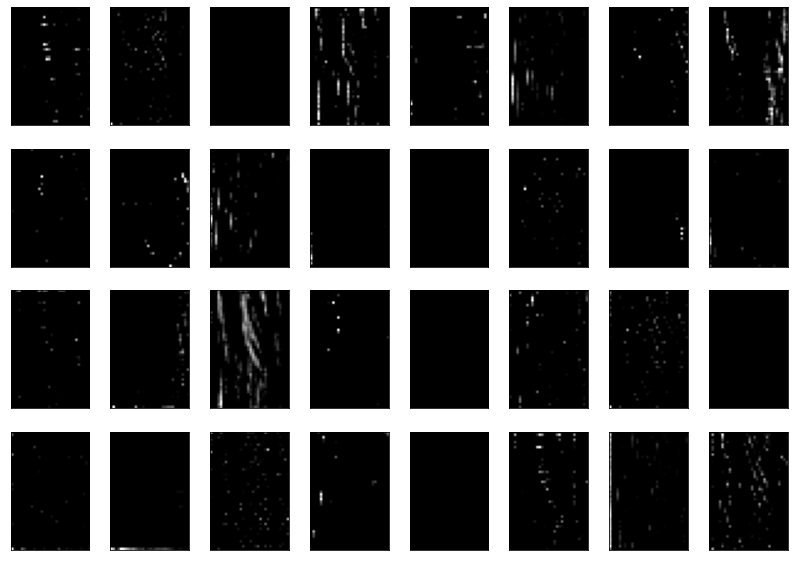

Current layer: conv3/conv3_1


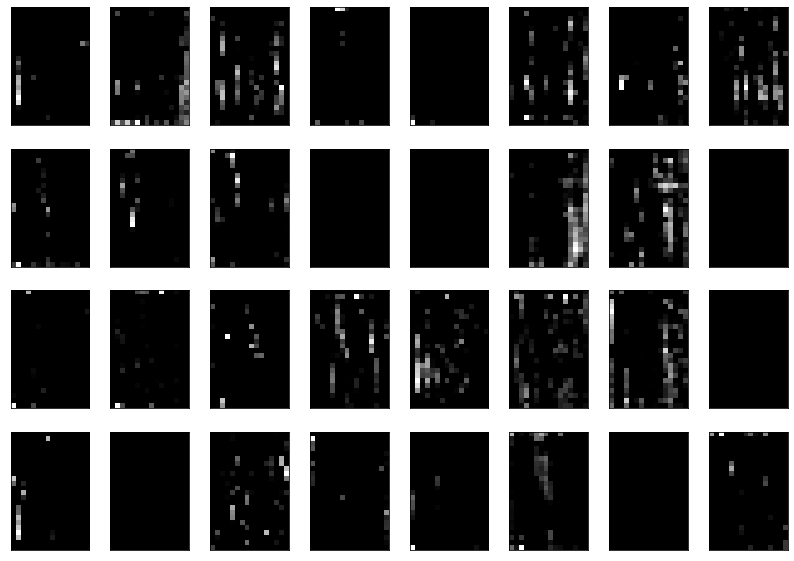

Current layer: conv3/conv3_2


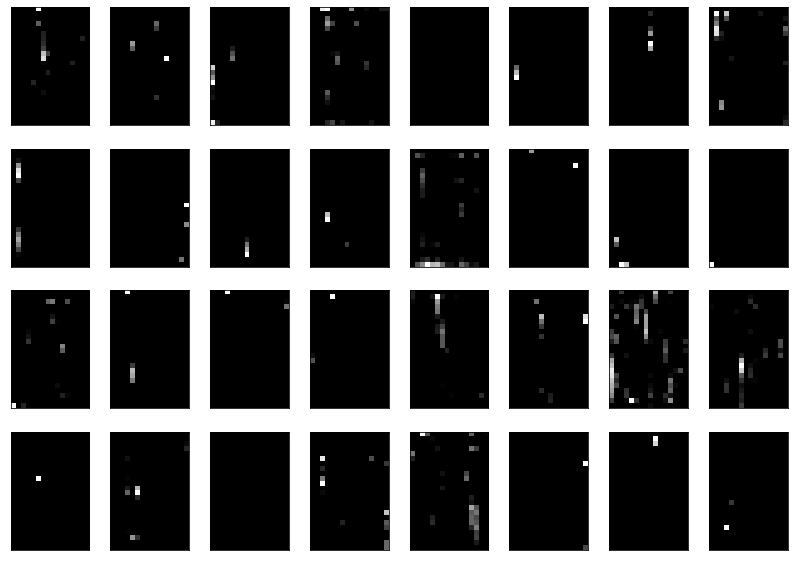

Current layer: conv4/conv4_1


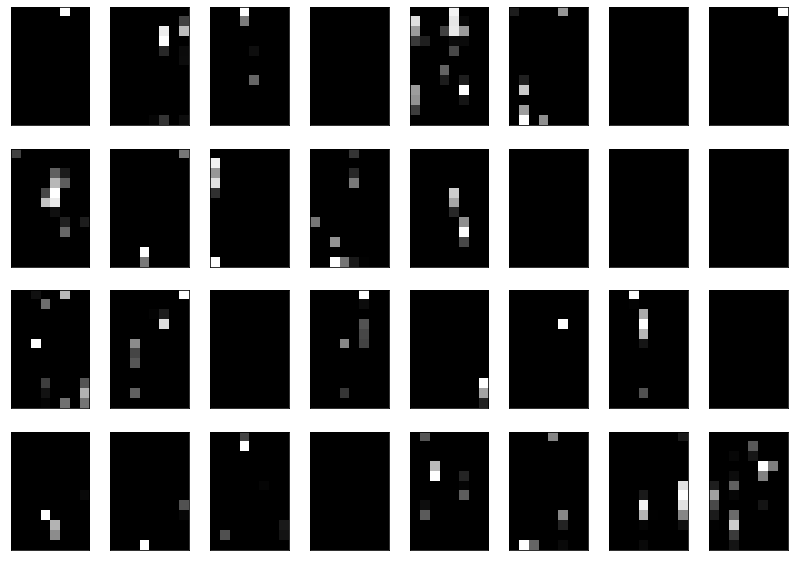

In [59]:
# VGGISH Visualized
MODEL_NAME="VGGISH"
model = get_model(MODEL_NAME)
ckp_path = "C:\\Users\\User\\Documents\\comparing_acoustic_deep_neural_networks\\training\\20220416-150422_main\\{}\\checkpoints\\cp.ckpt".format(MODEL_NAME)
model.load_weights(ckp_path).expect_partial()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(), #from_logits=True
    metrics=['accuracy'],
)

conv_layers = []
for i, layer in enumerate(model.layers):
    if 'conv' in layer.name:
		# continue
        conv_layers.append(layer.name)
    #    print(i, layer.name)
    
for idx, layer in enumerate(model.layers):
	if layer.name in conv_layers[:5]:
		print("Current layer: {}".format(layer.name))
		model_x_layer = Model(inputs=model.inputs, outputs=model.layers[idx].output)
		# model_x_layer.summary()

		feature_maps = model_x_layer.predict(melspec)[0]
		feature_maps = tf.transpose(feature_maps, [2, 0, 1])

		fig, axs = plt.subplots(4, 8, figsize=(14,10))
		axs=axs.flatten()
		for feature_map, ax in zip(feature_maps, axs):
			# specify subplot and turn of axis
			# plot filter channel in grayscale
			ax.imshow(feature_map, cmap='gray')
			ax.set_xticks([])
			ax.set_yticks([])
			# print(feature_map.shape)
		# show the figure
		plt.show()

Current layer: layer2/pointwise_conv


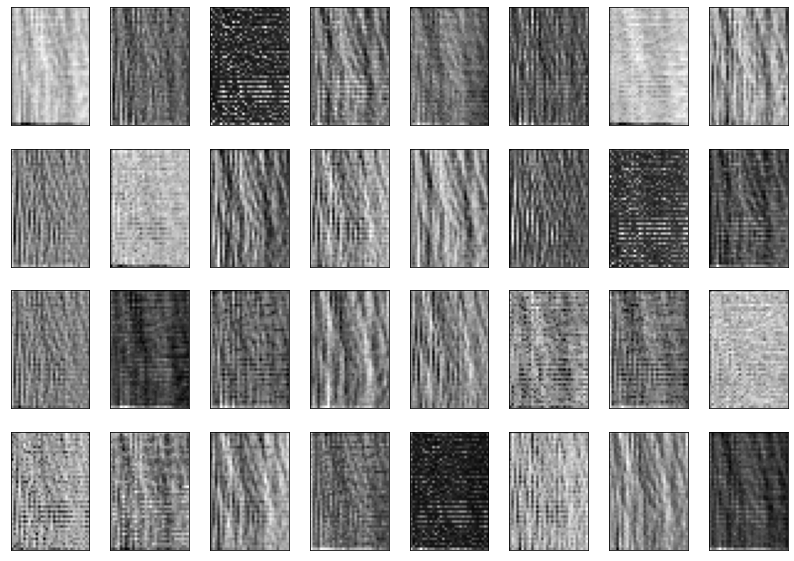

Current layer: layer3/pointwise_conv


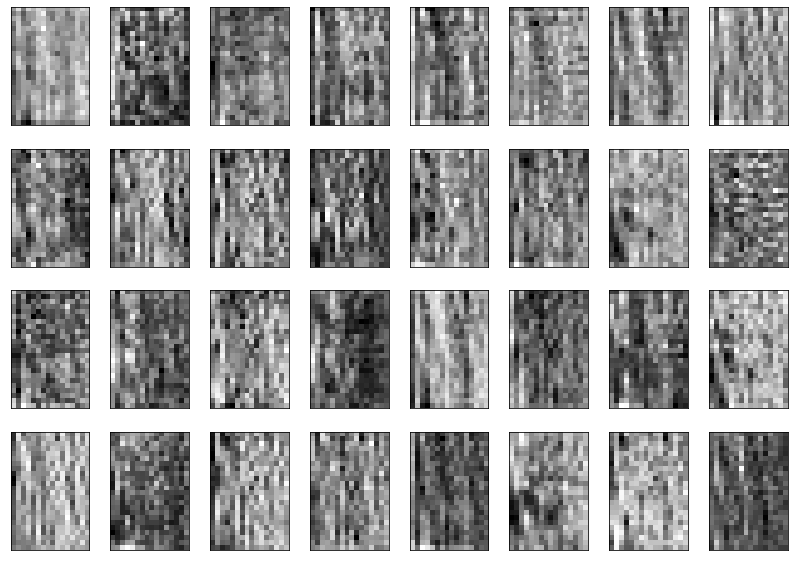

Current layer: layer4/pointwise_conv


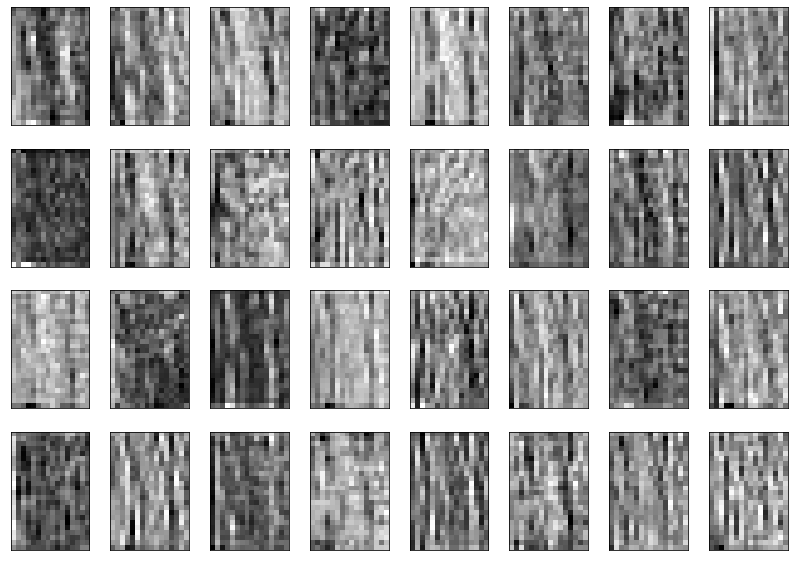

Current layer: layer5/pointwise_conv


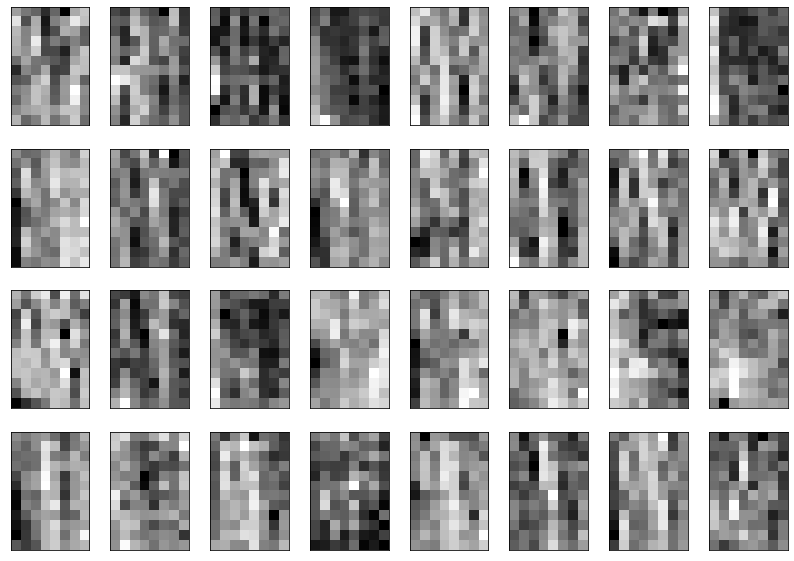

Current layer: layer6/pointwise_conv


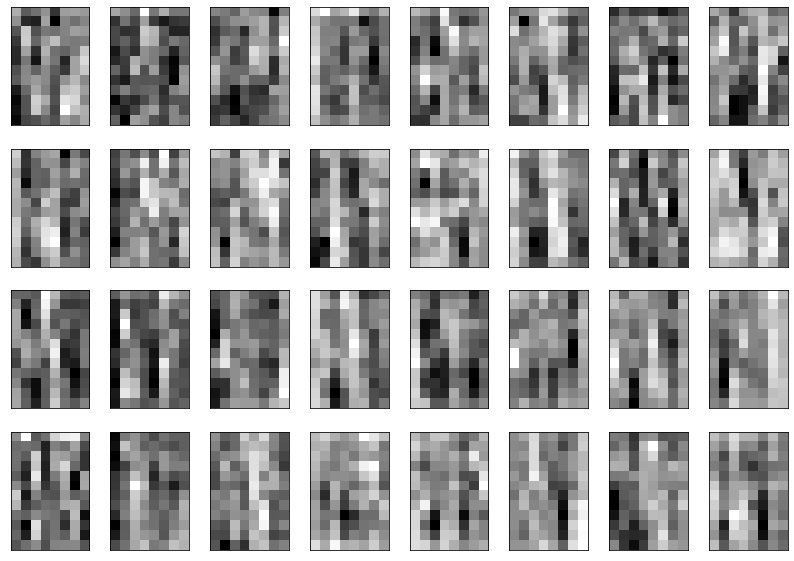

In [60]:
# YAMNET Visualized
MODEL_NAME="YAMNET"
model = get_model(MODEL_NAME)
ckp_path = "C:\\Users\\User\\Documents\\comparing_acoustic_deep_neural_networks\\training\\20220416-150422_main\\YAMNET\\checkpoints\\cp.ckpt"
model.load_weights(ckp_path)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(), #from_logits=True
    metrics=['accuracy'],
)

conv_layers = []
for i, layer in enumerate(model.layers):
    if ('pointwise_conv' in layer.name) and 'relu' not in layer.name and 'bn' not in layer.name:
		# continue
        conv_layers.append(layer.name)
    #    print(i, layer.name)
    
for idx, layer in enumerate(model.layers):
	if layer.name in conv_layers[:5]:
		print("Current layer: {}".format(layer.name))
		model_x_layer = Model(inputs=model.inputs, outputs=model.layers[idx].output)
		# model_x_layer.summary()

		feature_maps = model_x_layer.predict(melspec)[0]
		feature_maps = tf.transpose(feature_maps, [2, 0, 1])

		fig, axs = plt.subplots(4, 8, figsize=(14,10))
		axs=axs.flatten()
		for feature_map, ax in zip(feature_maps, axs):
			# specify subplot and turn of axis
			# plot filter channel in grayscale
			ax.imshow(feature_map, cmap='gray')
			ax.set_xticks([])
			ax.set_yticks([])
			# print(feature_map.shape)
		# show the figure
		plt.show()

Current layer: block1a_project_conv


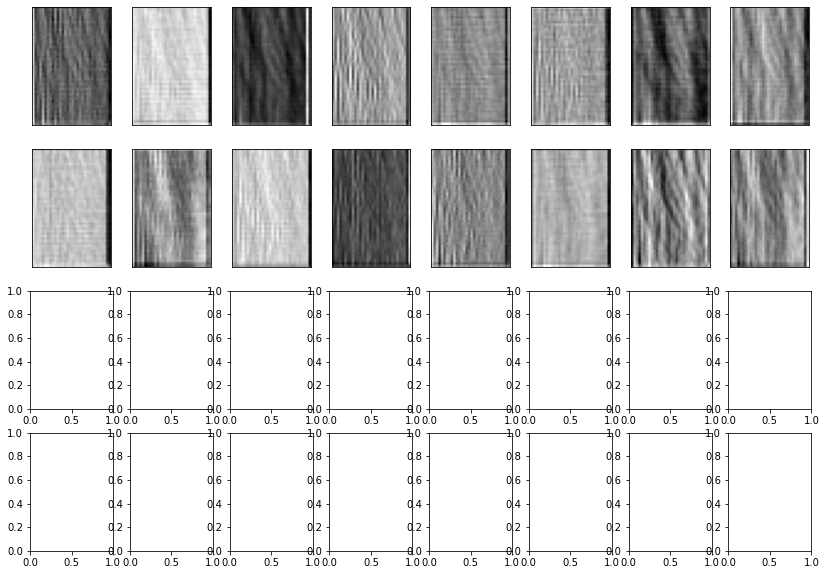

Current layer: block2a_project_conv


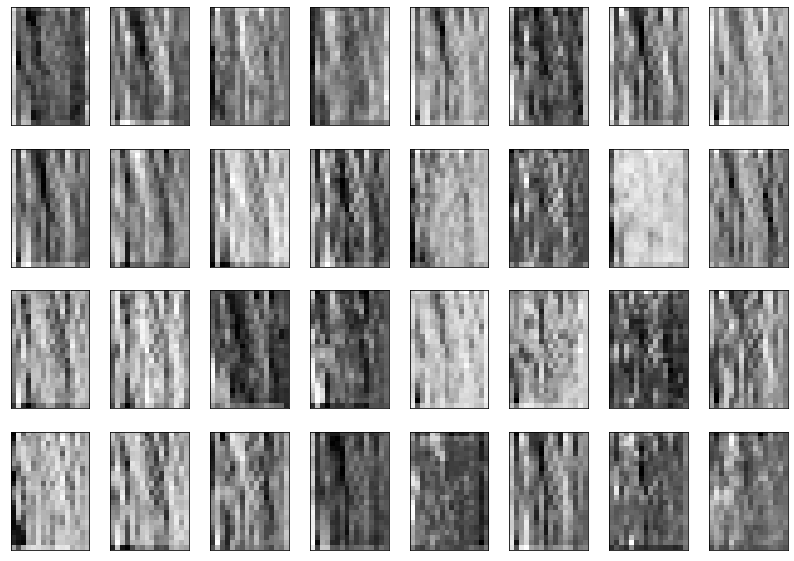

Current layer: block2b_project_conv


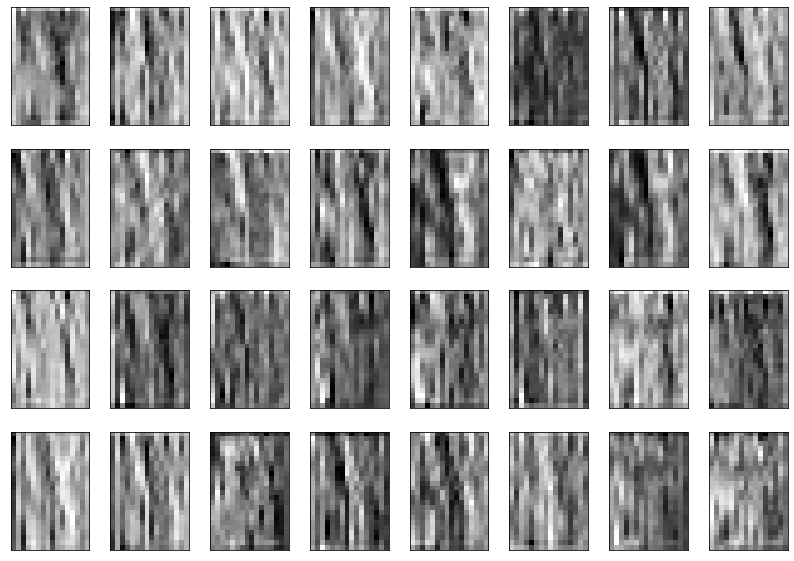

Current layer: block3a_project_conv


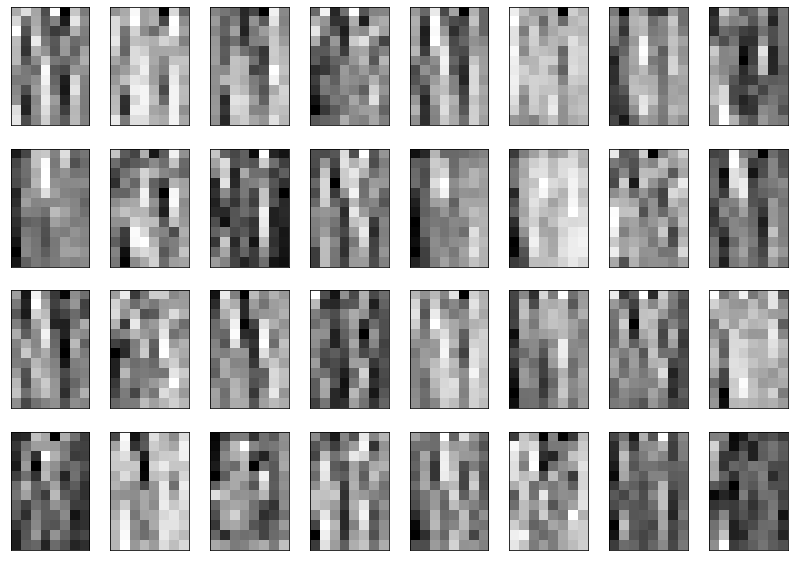

Current layer: block3b_project_conv


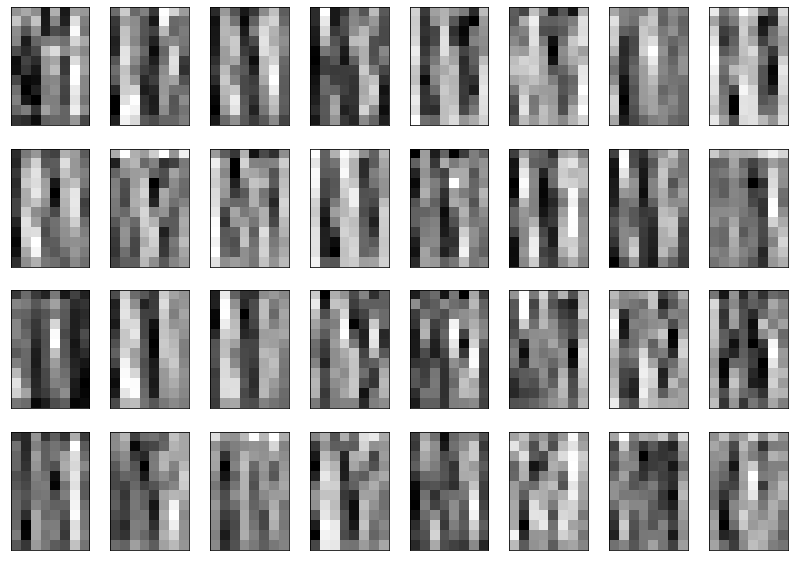

In [61]:
# YAMNET Visualized
MODEL_NAME="EfficientNetV2_B0"
model = get_model(MODEL_NAME)
ckp_path = "C:\\Users\\User\\Documents\\comparing_acoustic_deep_neural_networks\\training\\20220416-150422_main\\{}\\checkpoints\\cp.ckpt".format(MODEL_NAME)
model.load_weights(ckp_path).expect_partial()

conv_layers = []
for i, layer in enumerate(model.layers):
    if 'project_conv' in layer.name:
        conv_layers.append(layer.name)
        # print(i, layer.name)
    
for idx, layer in enumerate(model.layers):
	if layer.name in conv_layers[:5]:
		print("Current layer: {}".format(layer.name))
		model_x_layer = Model(inputs=model.inputs, outputs=model.layers[idx].output)
		# model_x_layer.summary()

		feature_maps = model_x_layer.predict(melspec)[0]
		feature_maps = tf.transpose(feature_maps, [2, 0, 1])

		fig, axs = plt.subplots(4, 8, figsize=(14,10))
		axs=axs.flatten()
		for feature_map, ax in zip(feature_maps, axs):
			# specify subplot and turn of axis
			# plot filter channel in grayscale
			ax.imshow(feature_map, cmap='gray')
			ax.set_xticks([])
			ax.set_yticks([])
			# print(feature_map.shape)
		# show the figure
		plt.show()

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 96, 64, 1)]  0           []                               
                                                                                                  
 Conv (Conv2D)                  (None, 48, 32, 16)   144         ['input_4[0][0]']                
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 48, 32, 16)  64          ['Conv[0][0]']                   
 tion)                                                                                            
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 48, 32, 16)  0           ['Conv/BatchNorm[0][0]']  

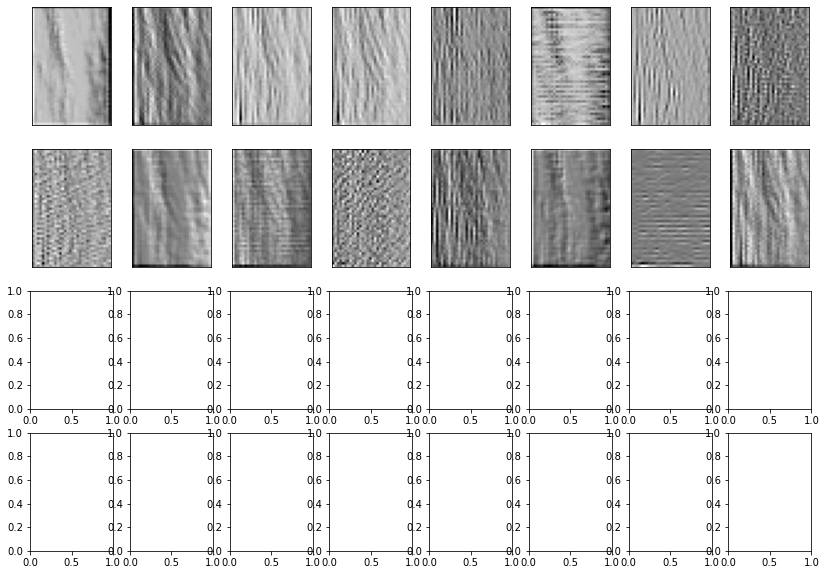

Current layer: expanded_conv/depthwise/BatchNorm


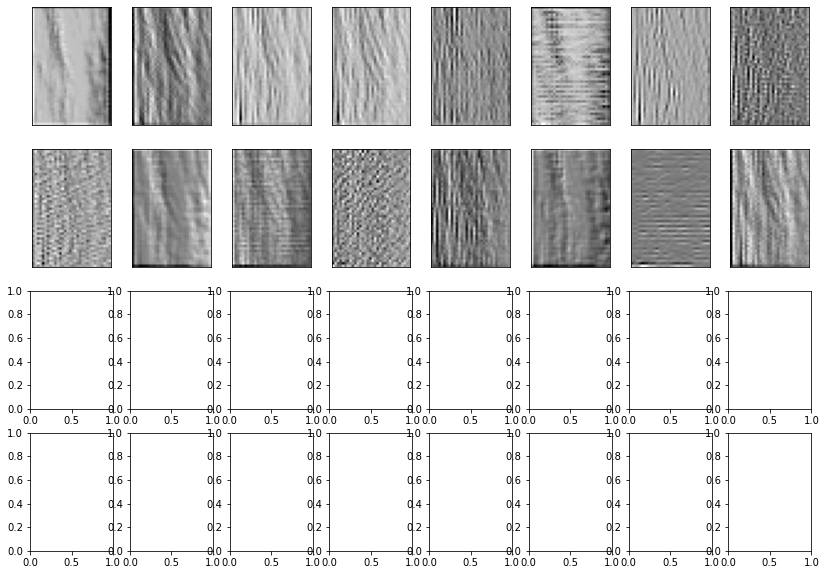

Current layer: expanded_conv/project


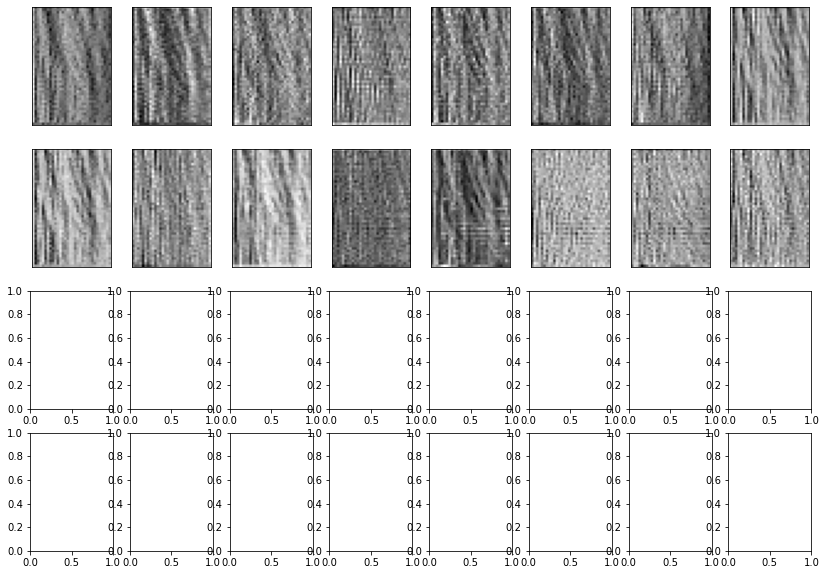

Current layer: expanded_conv/project/BatchNorm


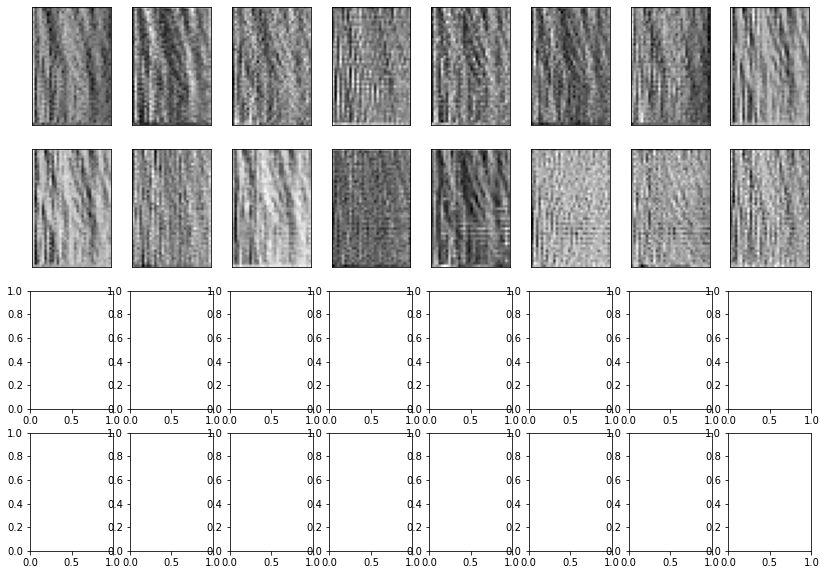

Current layer: expanded_conv/Add


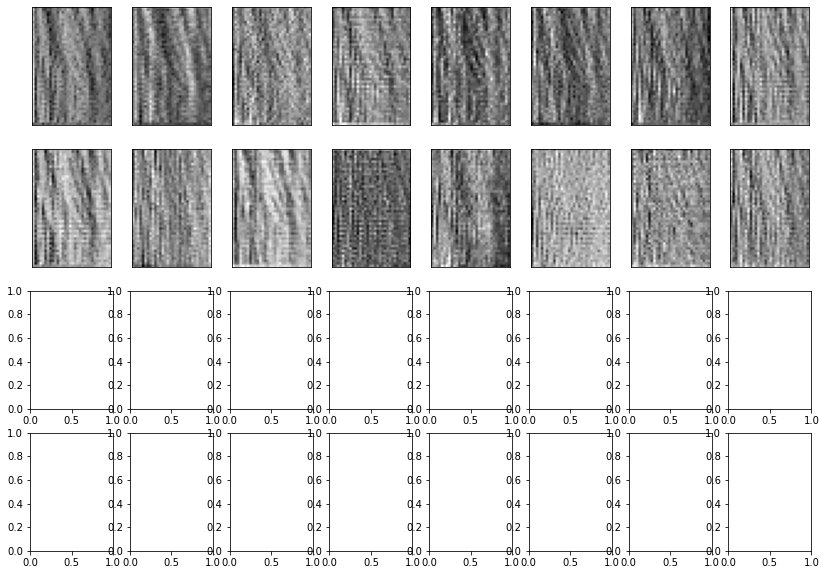

Current layer: expanded_conv_1/expand


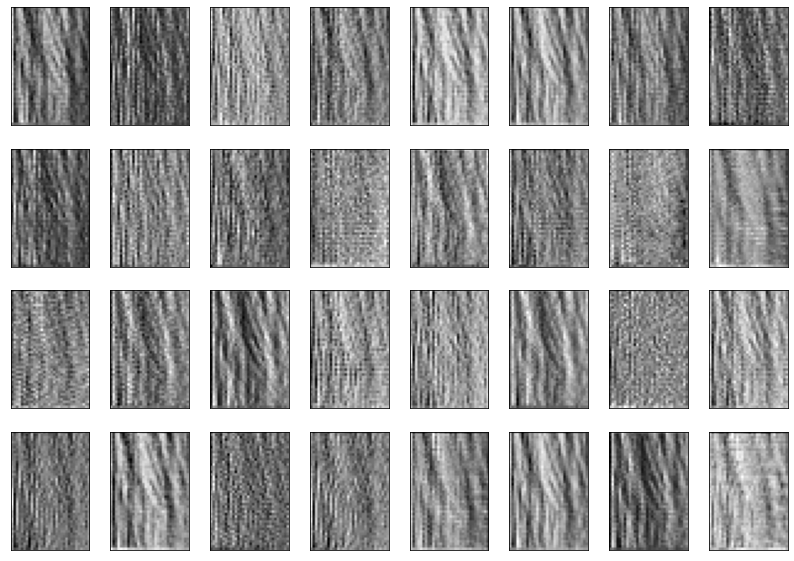

Current layer: expanded_conv_1/expand/BatchNorm


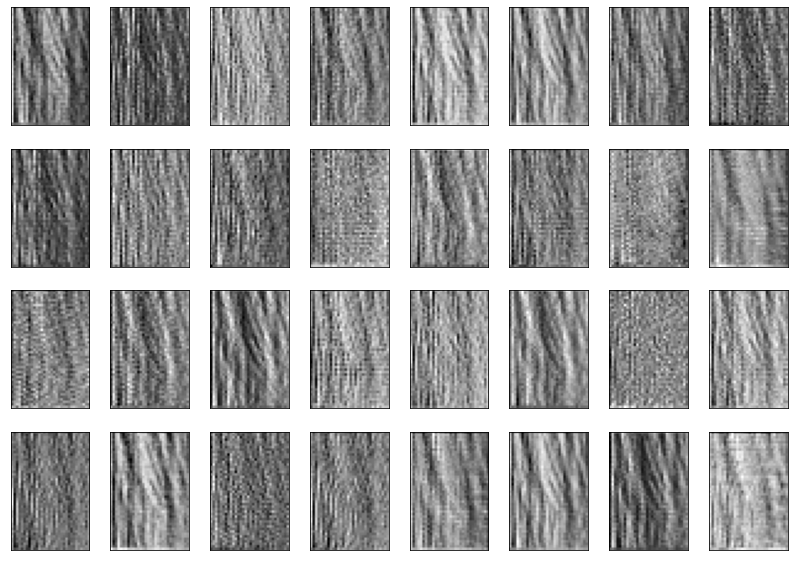

Current layer: expanded_conv_1/depthwise/pad


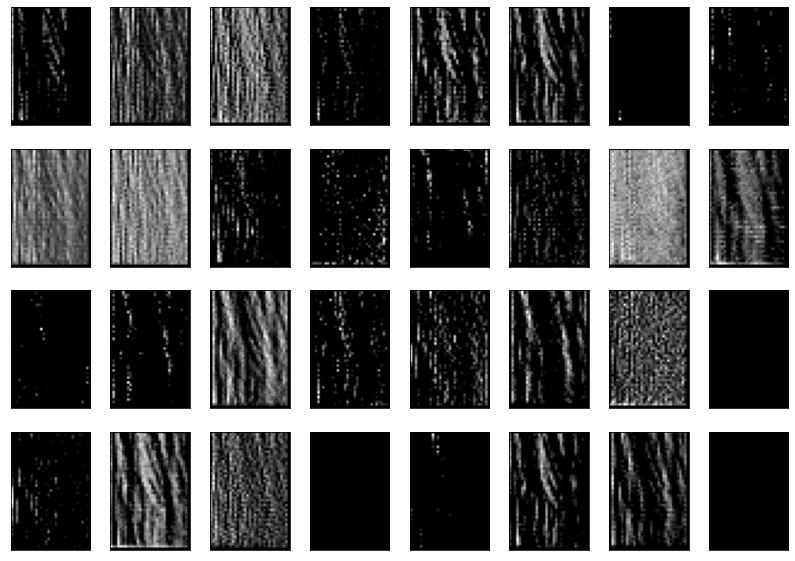

Current layer: expanded_conv_1/depthwise


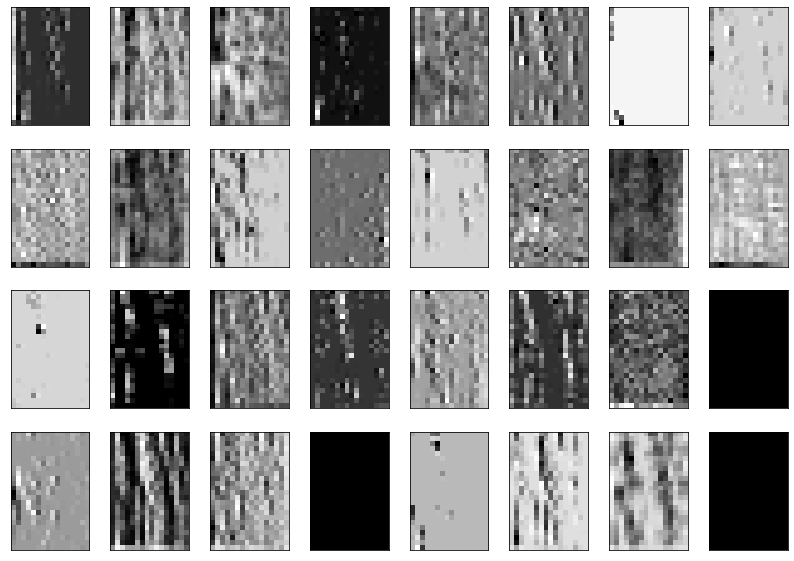

Current layer: expanded_conv_1/depthwise/BatchNorm


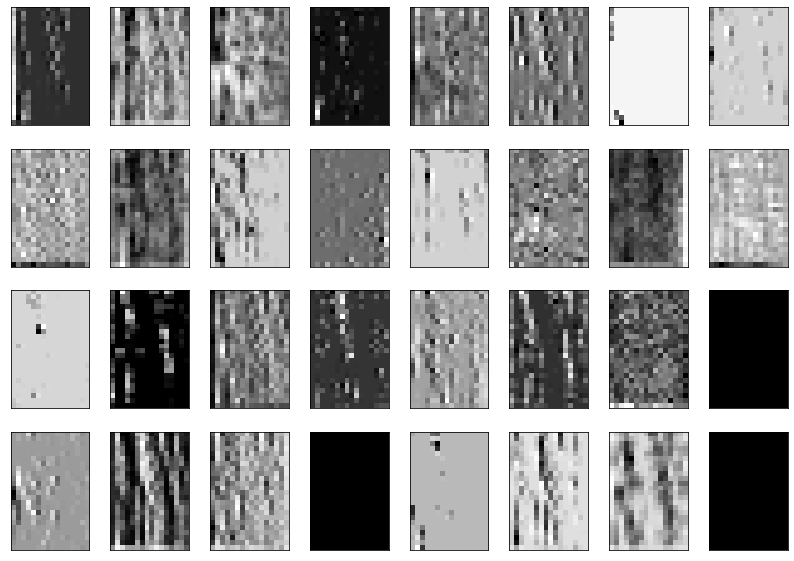

Current layer: expanded_conv_1/project


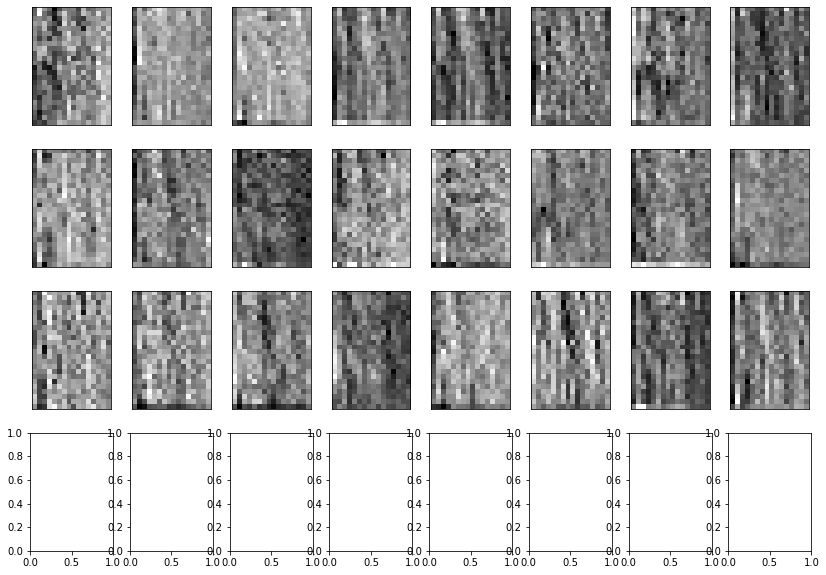

Current layer: expanded_conv_1/project/BatchNorm


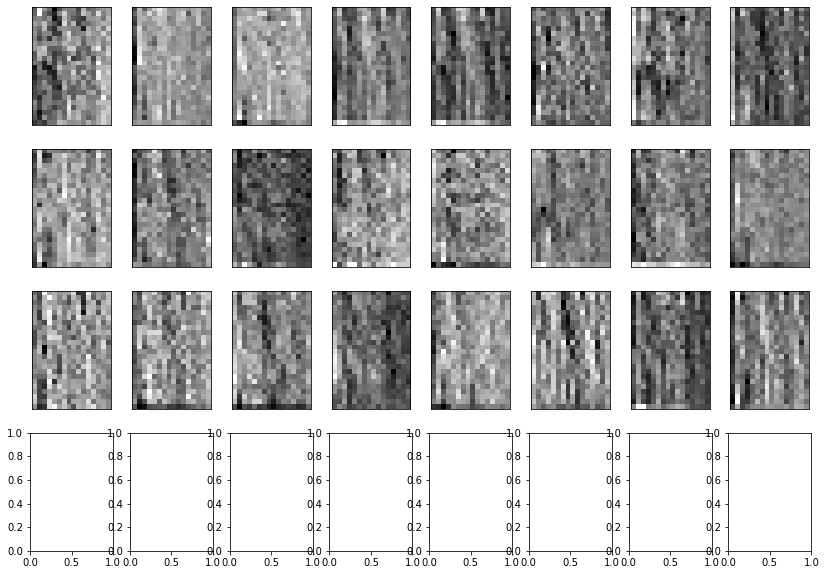

Current layer: expanded_conv_2/expand


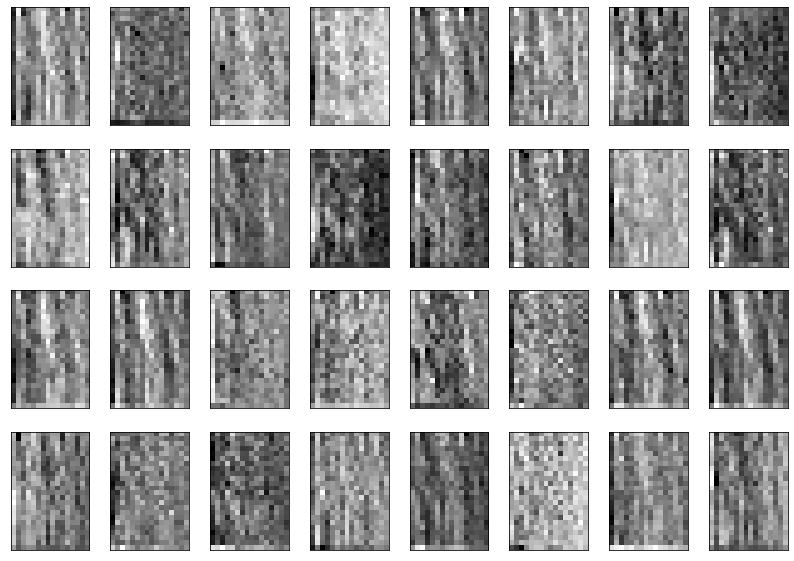

Current layer: expanded_conv_2/expand/BatchNorm


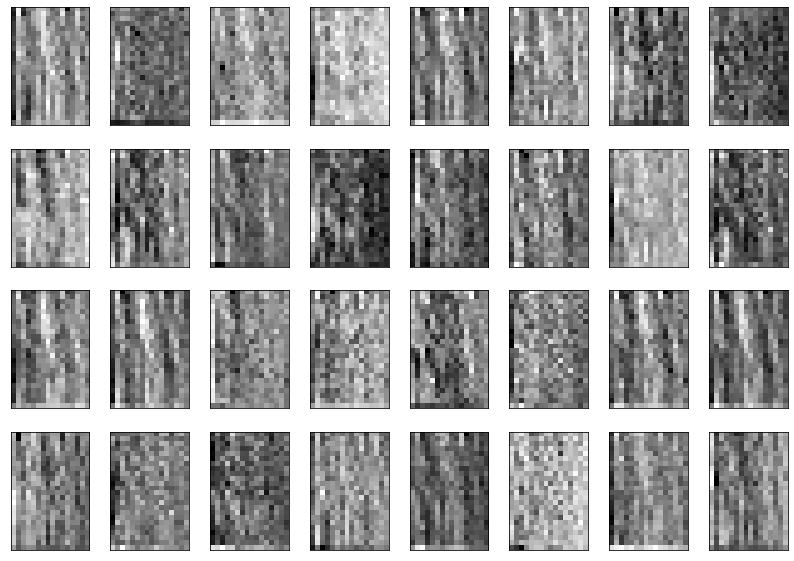

Current layer: expanded_conv_2/depthwise


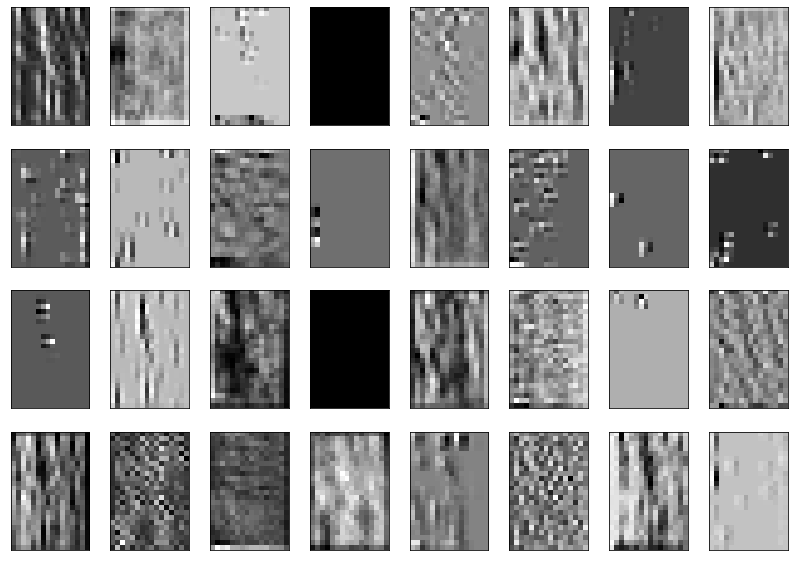

Current layer: expanded_conv_2/depthwise/BatchNorm


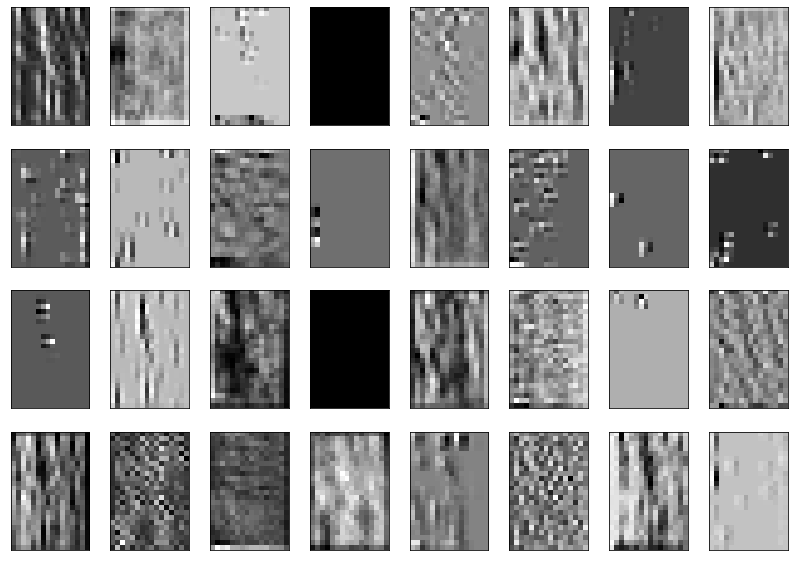

Current layer: expanded_conv_2/project


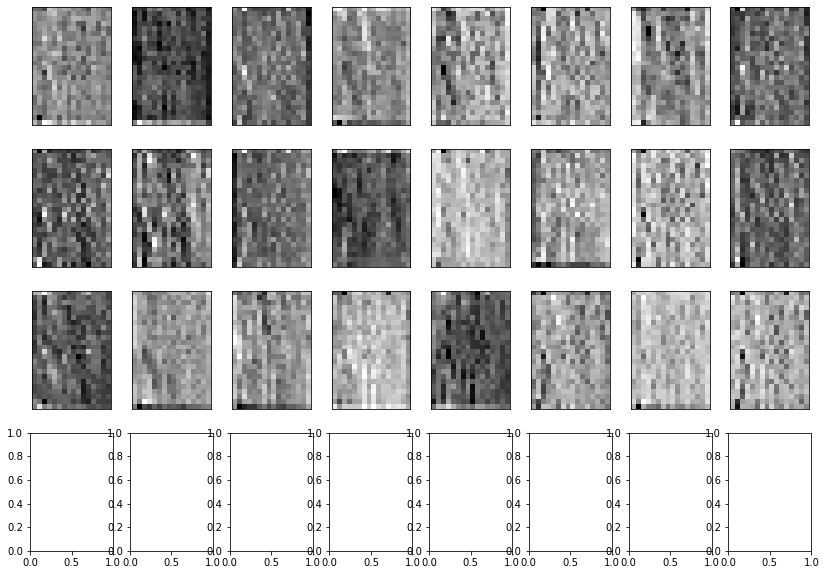

Current layer: expanded_conv_2/project/BatchNorm


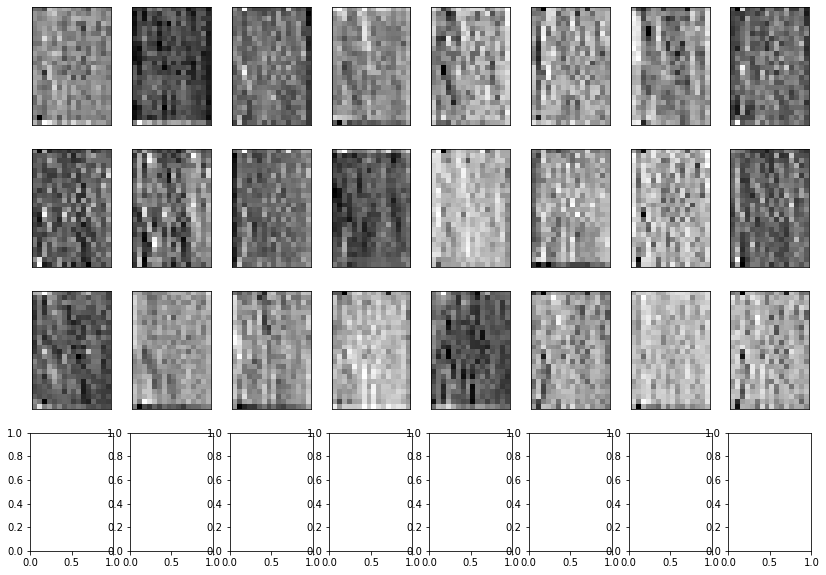

Current layer: expanded_conv_2/Add


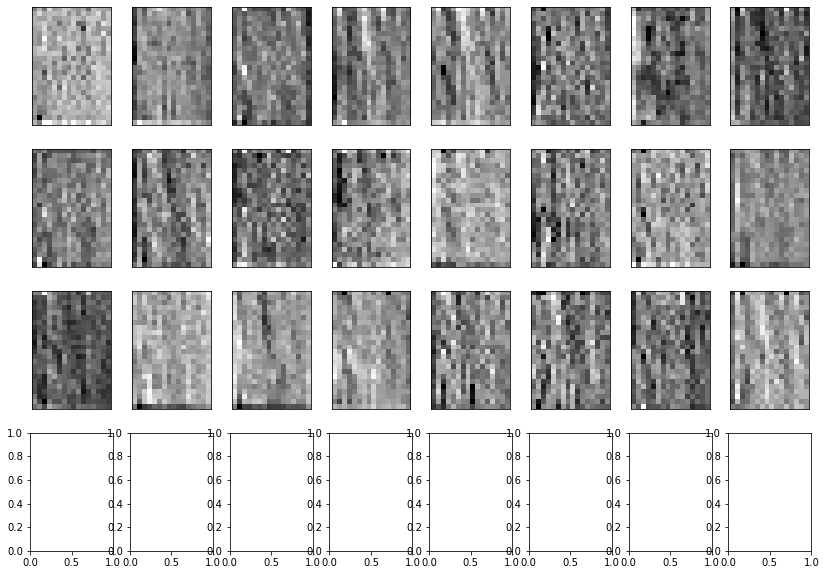

Current layer: expanded_conv_3/expand


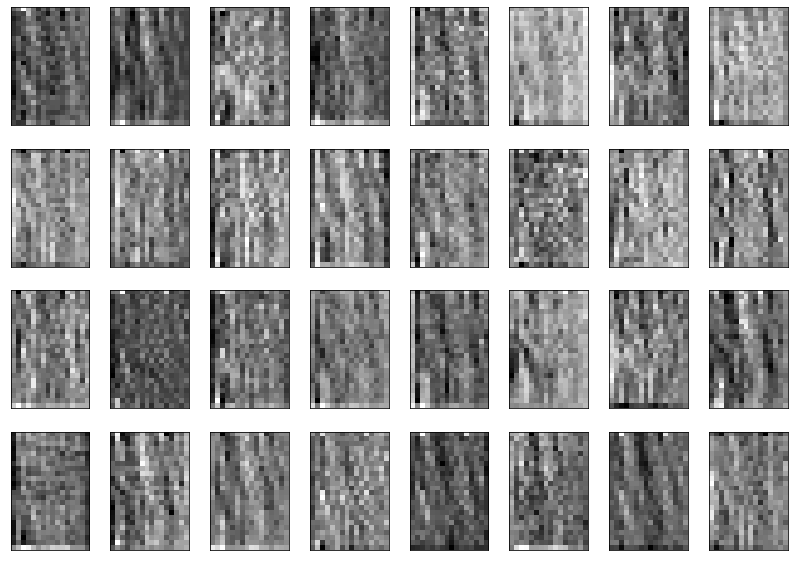

Current layer: expanded_conv_3/expand/BatchNorm


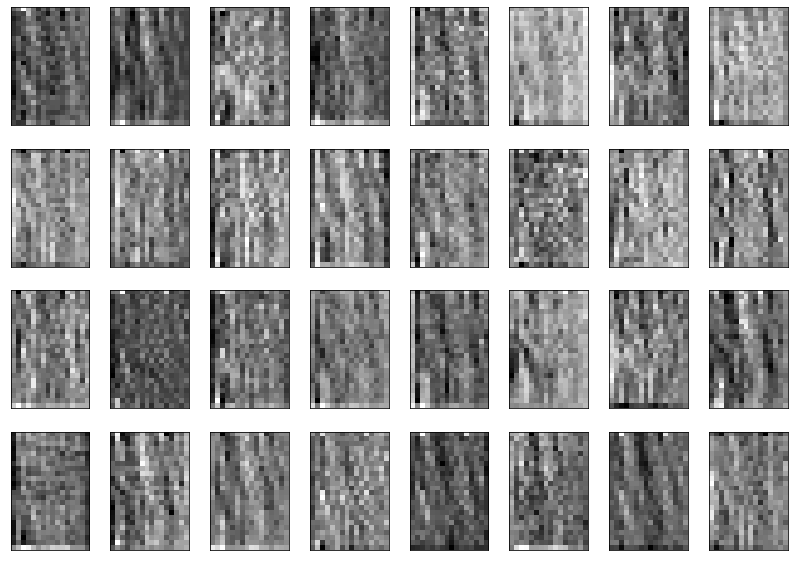

Current layer: expanded_conv_3/depthwise/pad


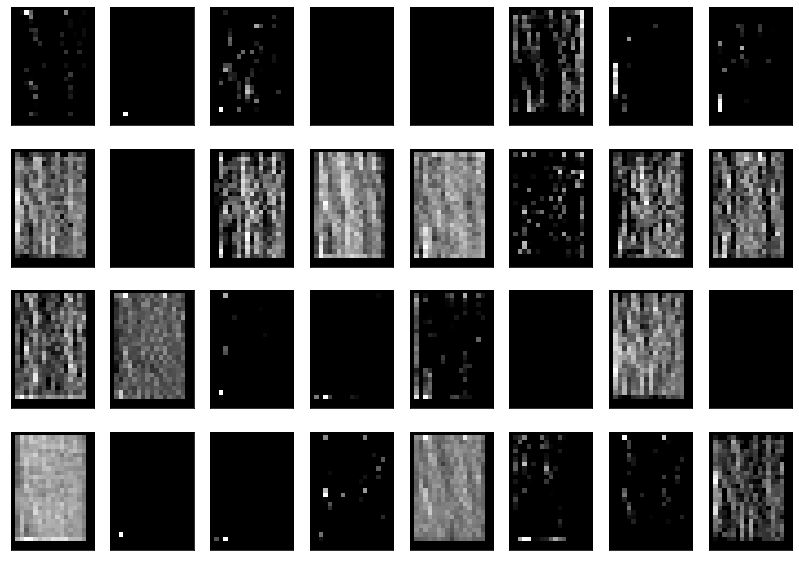

Current layer: expanded_conv_3/depthwise


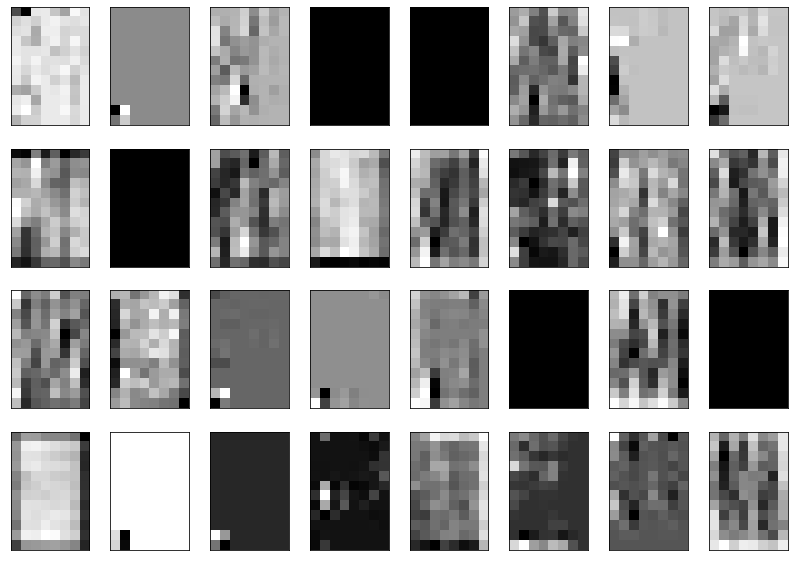

Current layer: expanded_conv_3/depthwise/BatchNorm


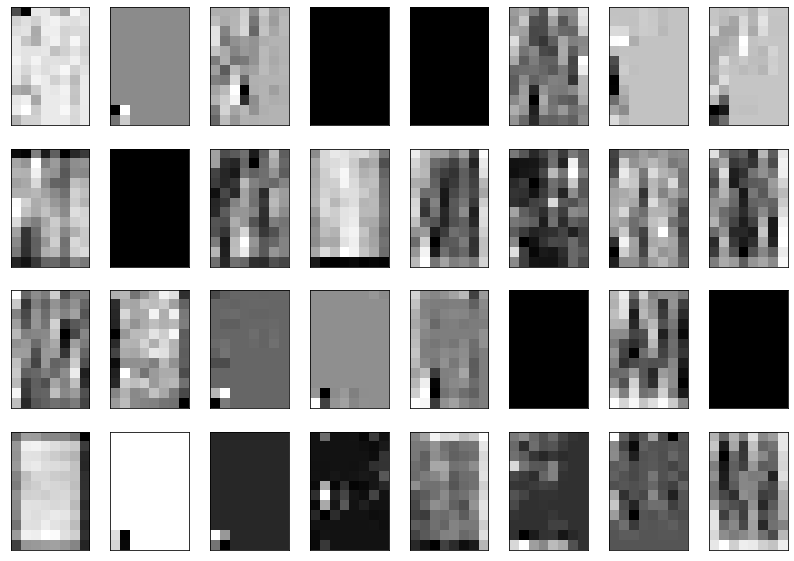

Current layer: expanded_conv_3/squeeze_excite/AvgPool


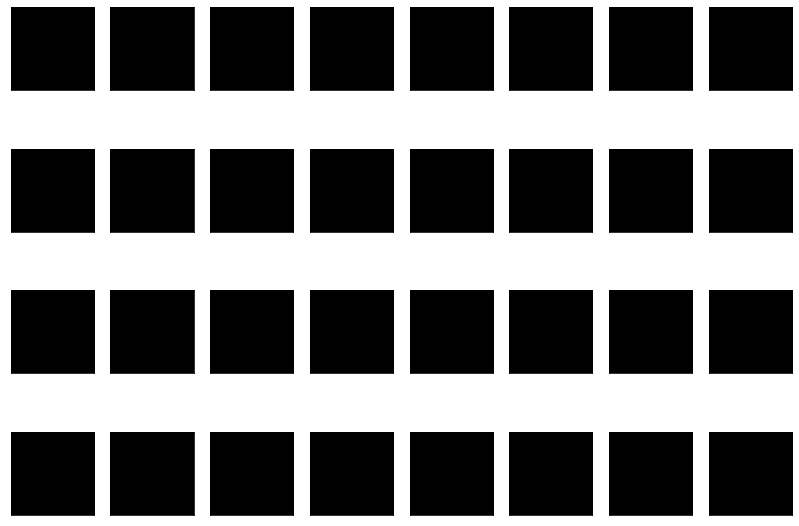

Current layer: expanded_conv_3/squeeze_excite/Conv


KeyboardInterrupt: 

In [57]:
# YAMNET Visualized
MODEL_NAME="MobileNetV3"
model = get_model(MODEL_NAME)
ckp_path = "C:\\Users\\User\\Documents\\comparing_acoustic_deep_neural_networks\\training\\20220416-150422_main\\{}\\checkpoints\\cp.ckpt".format(MODEL_NAME)
model.load_weights(ckp_path)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(), #from_logits=True
    metrics=['accuracy'],
)

model.summary()
conv_layers = []
for i, layer in enumerate(model.layers):
    if 'conv' in layer.name:
		# continue
        conv_layers.append(layer.name)
        print(i, layer.name)
    
for idx, layer in enumerate(model.layers):
	if layer.name in conv_layers:
		print("Current layer: {}".format(layer.name))
		model_x_layer = Model(inputs=model.inputs, outputs=model.layers[idx].output)
		# model_x_layer.summary()

		feature_maps = model_x_layer.predict(melspec)[0]
		feature_maps = tf.transpose(feature_maps, [2, 0, 1])

		fig, axs = plt.subplots(4, 8, figsize=(14,10))
		axs=axs.flatten()
		for feature_map, ax in zip(feature_maps, axs):
			# specify subplot and turn of axis
			# plot filter channel in grayscale
			ax.imshow(feature_map, cmap='gray')
			ax.set_xticks([])
			ax.set_yticks([])
			# print(feature_map.shape)
		# show the figure
		plt.show()